In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [424]:
train=pd.read_csv(r"C:\Users\Dhruv\Downloads\train.csv")
test= pd.read_csv(r"C:\Users\Dhruv\Downloads\test.csv")

C:\Users\dhruv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,6,7,10,11,12,13,14,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [425]:
train["coding_standard"].fillna(train["coding_standard"].mode()[0],inplace =True)
test["coding_standard"].fillna(test["coding_standard"].mode()[0],inplace =True)

In [426]:
train["coding_standard_output"].fillna(train["coding_standard_output"].mode()[0],inplace =True)
test["coding_standard_output"].fillna(test["coding_standard_output"].mode()[0],inplace =True)

In [427]:
train=train.replace(['vp8'],"1")
train=train.replace(['flv'],"2")
train=train.replace(['h264'],"3")
train=train.replace(['mpeg4'],"4")


In [428]:
test=test.replace(['vp8'],"1")
test=test.replace(['flv'],"2")
test=test.replace(['h264'],"3")
test=test.replace(['mpeg4'],"4")

In [429]:
train.fillna("0",inplace=True)
test.fillna("0",inplace=True)

In [430]:
train=train.replace(['-'],"0")
test=test.replace(['-'],"0")

In [431]:
train=train.replace(['#NAME?'],"0")

In [180]:
train.head()

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
0,1,131.760000,1.0,640.0,480.0,104723.0,25.145039,37.0,3257.0,0.0,...,778937.0,0.0,1724802.0,2.0,539000.0,24.00,640.0,480.0,221152.0,1.048
1,2,189.956000,2.0,320.0,240.0,231296.0,29.000000,97.0,5597.0,0.0,...,4911734.0,0.0,5492026.0,2.0,109000.0,29.97,320.0,240.0,218664.0,0.468
2,3,110.966995,3.0,480.0,360.0,0.0,30.000000,59.0,3271.0,0.0,...,4978664.0,0.0,5508291.0,3.0,56000.0,15.00,320.0,240.0,216820.0,3.696
3,4,95.462000,3.0,640.0,480.0,809256.0,29.000000,51.0,2811.0,0.0,...,8770159.0,0.0,9656655.0,1.0,109000.0,12.00,320.0,240.0,221160.0,3.452
4,5,63.667000,3.0,640.0,480.0,972572.0,15.000000,33.0,923.0,0.0,...,6480438.0,0.0,7740095.0,2.0,56000.0,24.00,1280.0,720.0,219656.0,2.692


In [432]:
for i in train.columns:
    if(train[i].dtype=="object"):
        train[i]=train[i].astype(float)


In [433]:
for i in train.iloc[:,train.columns.get_loc("video_duration"):train.columns.get_loc("video_duration")+21]<0:
    for index, j in enumerate(train[i]):
        if j<0:
            train.at[index, i] = j*(-1)

In [434]:
for column in ['video_duration',"bitrate","framerate",'i_frames', 'p_frames','frames','i_size','p_size','size','bitrate_output','framerate_output','allocated _memory','total_processing_time']:
    train[column]=train[column].replace("0",train[column].mean())

In [435]:
for column in ['width', 'height','output_width', 'output_height']:
    train[column]=train[column].replace("0",train[column].mode()[0])

In [436]:
for i in test.columns:
    if(test[i].dtype=="object"):
        test[i]=test[i].astype(float)

In [437]:
for i in test.iloc[:,test.columns.get_loc("video_duration"):test.columns.get_loc("video_duration")+20]<0:
    for index, j in enumerate(test[i]):
        if j<0:
            test.at[index, i] = j*(-1)

In [438]:
for column in ['video_duration',"bitrate","framerate",'i_frames', 'p_frames','frames','i_size','p_size','size','bitrate_output','framerate_output','allocated _memory']:
    test[column]=test[column].replace("0",test[column].mean())

In [439]:
for column in ['width', 'height','output_width', 'output_height']:
    test[column]=test[column].replace("0",test[column].mode()[0])

In [440]:
train=train.drop("id",axis=1)

In [21]:
train.describe()

,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
count,48150.000000,48150.000000,48150.000000,48150.000000,4.815000e+04,4.815000e+04,4.815000e+04,48150.000000,48150.000000,4.815000e+04,...,4.815000e+04,48150.000000,4.815000e+04,48150.000000,4.815000e+04,48150.000000,4.815000e+04,48150.000000,4.815000e+04,48150.000000
mean,286.321464,2.535535,637.753354,412.450592,6.924992e+05,1.695631e+02,7.979794e+04,6527.463593,8.702762,1.243068e+05,...,2.580956e+07,-0.001495,2.406327e+09,2.503302,1.428185e+07,27.212587,1.075155e+03,519.237383,8.217704e+05,9.950966
std,294.086453,1.064658,2950.323852,240.461552,1.094527e+06,3.077031e+04,1.731769e+07,6111.415041,90.729068,2.564843e+07,...,5.244007e+08,0.128730,4.520738e+11,1.120138,2.562398e+09,1321.524191,5.835030e+04,2098.249080,8.261615e+07,15.967769
min,0.000000,1.000000,0.000000,0.000000,-3.971120e+05,-7.000000e+00,0.000000e+00,-5974.000000,-44.000000,-1.087900e+04,...,-4.552369e+07,-16.000000,0.000000e+00,0.000000,0.000000e+00,-24.000000,0.000000e+00,-720.000000,-8.643220e+05,-1.924000
25%,106.765000,1.000000,320.000000,240.000000,1.343340e+05,1.500000e+01,3.900000e+01,2265.000000,0.000000,2.318000e+03,...,1.851539e+06,0.000000,2.258222e+06,2.000000,1.090000e+05,15.000000,3.200000e+02,240.000000,2.168200e+05,2.096000
50%,239.141660,3.000000,480.000000,360.000000,2.911500e+05,2.502174e+01,8.000000e+01,5515.000000,0.000000,5.628000e+03,...,6.166260e+06,0.000000,7.881069e+06,3.000000,5.390000e+05,24.000000,4.800000e+02,360.000000,2.194800e+05,4.432000
75%,379.320000,3.000000,640.000000,480.000000,6.529670e+05,2.900000e+01,1.380000e+02,9155.000000,0.000000,9.232000e+03,...,1.515506e+07,0.000000,1.977335e+07,4.000000,3.000000e+06,25.000000,1.280000e+03,720.000000,2.196560e+05,10.417000
max,25844.086000,4.000000,640000.000000,1080.000000,6.010942e+06,6.745325e+06,3.800000e+09,304959.000000,9407.000000,5.628000e+09,...,1.090000e+11,0.000000,9.850000e+13,4.000000,5.600000e+11,290000.970000,1.280000e+07,360000.000000,1.656680e+10,214.481000


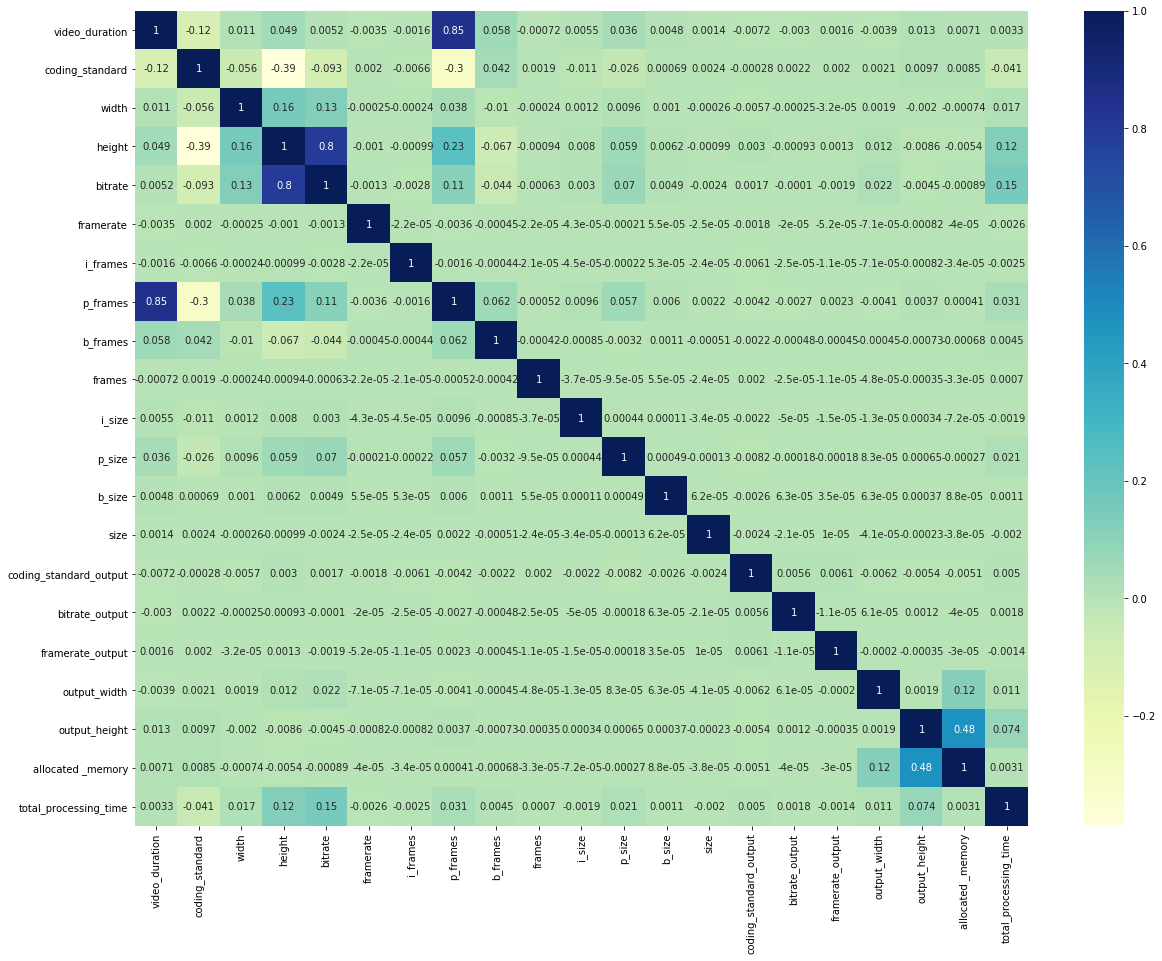

In [77]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(),annot=True, cmap="YlGnBu")

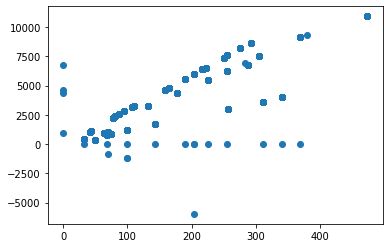

In [61]:
plt.scatter(train.video_duration,train.p_frames)

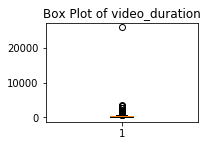

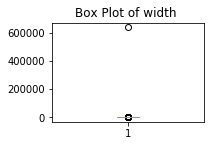

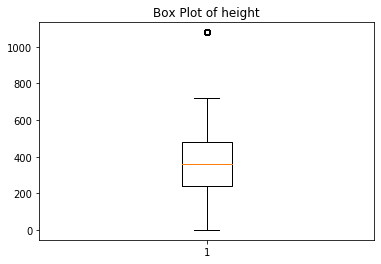

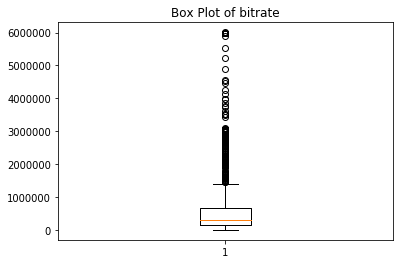

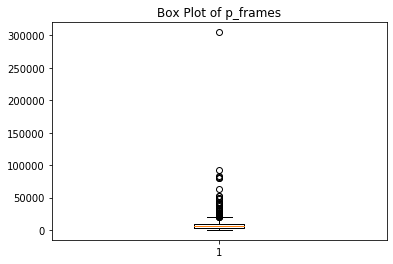

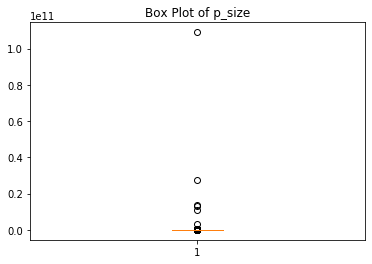

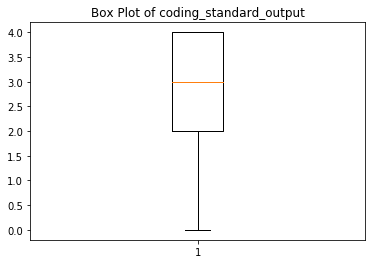

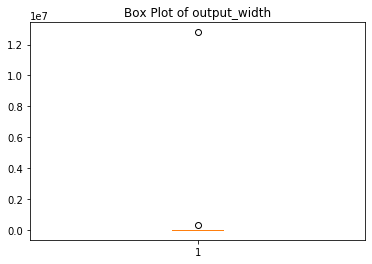

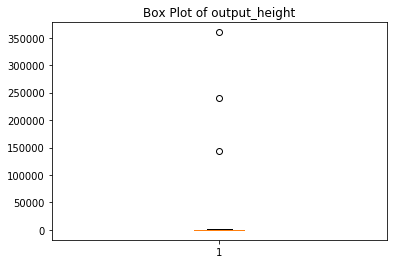

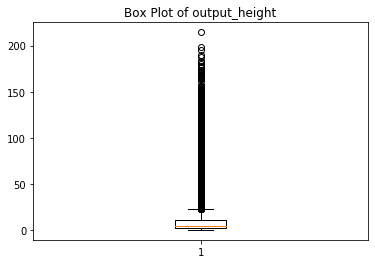

In [195]:
plt.subplot(2,2,1)
plt.boxplot(train['video_duration'])
plt.title('Box Plot of video_duration')
plt.show()
plt.subplot(2,2,2)
plt.boxplot(train['width'])
plt.title('Box Plot of width ')
plt.show()
#plt.subplot(2,2,3)
plt.boxplot(train['height'])
plt.title('Box Plot of height')
plt.show()
#plt.subplot(2,2,4)
plt.boxplot(train['bitrate'])
plt.title('Box Plot of bitrate')
plt.show()
plt.boxplot(train['p_frames'])
plt.title('Box Plot of p_frames')
plt.show()
plt.boxplot(train['p_size'])
plt.title('Box Plot of p_size')
plt.show()
plt.boxplot(train['coding_standard_output'])
plt.title('Box Plot of coding_standard_output')
plt.show()
plt.boxplot(train['output_width'])
plt.title('Box Plot of output_width')
plt.show()
plt.boxplot(train['output_height'])
plt.title('Box Plot of output_height')
plt.show()
plt.boxplot(train['total_processing_time'])
plt.title('Box Plot of output_height')
plt.show()

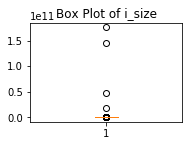

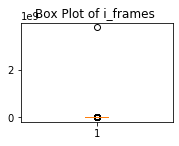

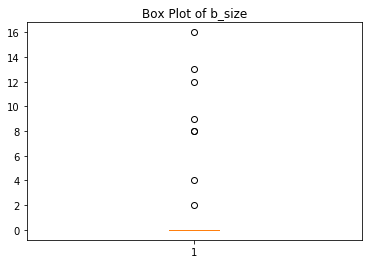

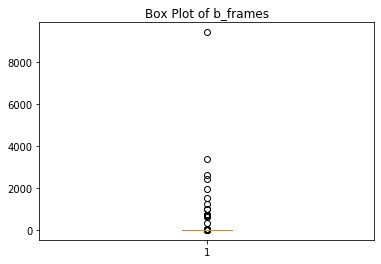

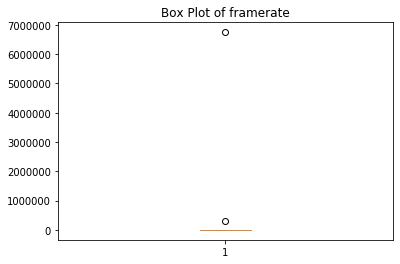

In [230]:
plt.subplot(2,2,1)
plt.boxplot(train['i_size'])
plt.title('Box Plot of i_size')
plt.show()
plt.subplot(2,2,2)
plt.boxplot(train['i_frames'])
plt.title('Box Plot of i_frames ')
plt.show()
#plt.subplot(2,2,3)
plt.boxplot(train['b_size'])
plt.title('Box Plot of b_size')
plt.show()
#plt.subplot(2,2,4)
plt.boxplot(train['b_frames'])
plt.title('Box Plot of b_frames')
plt.show()
plt.boxplot(train['framerate'])
plt.title('Box Plot of framerate')
plt.show()

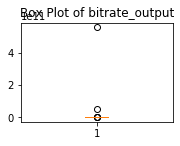

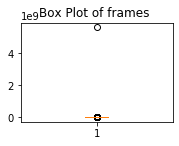

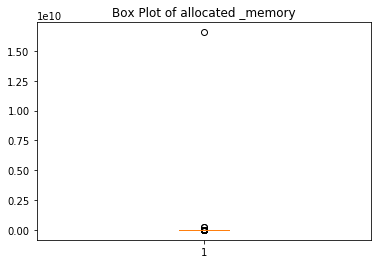

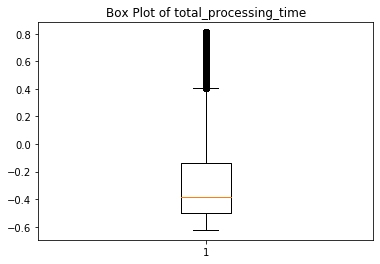

In [366]:
plt.subplot(2,2,1)
plt.boxplot(train['bitrate_output'])
plt.title('Box Plot of bitrate_output')
plt.show()
plt.subplot(2,2,2)
plt.boxplot(train['frames'])
plt.title('Box Plot of frames ')
plt.show()
#plt.subplot(2,2,3)
plt.boxplot(train['allocated _memory'])
plt.title('Box Plot of allocated _memory')
plt.show()
#plt.subplot(2,2,4)
plt.boxplot(train['total_processing_time'])
plt.title('Box Plot of total_processing_time')
plt.show()


In [48]:
train.columns

Index(['video_duration', 'coding_standard', 'width', 'height', 'bitrate',
       'framerate', 'i_frames', 'p_frames', 'b_frames', 'frames', 'i_size',
       'p_size', 'b_size', 'size', 'coding_standard_output', 'bitrate_output',
       'framerate_output', 'output_width', 'output_height',
       'allocated _memory', 'total_processing_time'],
      dtype='object')

In [384]:
def outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
 

In [441]:
cols=['allocated _memory']
for i in cols:
    lowerbound,upperbound = outlier(train[i])
    train.drop(train[ (train[i] > upperbound) | (train[i] < lowerbound) ].index , inplace=True)

In [449]:
cols=["framerate"]
for i in cols:
    lowerbound,upperbound = outlier(train[i])
    train.drop(train[ (train[i] > upperbound) | (train[i] < lowerbound) ].index , inplace=True)

In [350]:
cols=['total_processing_time']
for i in cols:
    lowerbound,upperbound = outlier(train[i])
    train.drop(train[ (train[i] > upperbound) | (train[i] < lowerbound) ].index , inplace=True)

In [ ]:
['video_duration',"p_frames","p_size","output_width","output_height"]

In [146]:
train[train['i_size']<0 ]
    

,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time


In [143]:
train[train<0]=train[train<0]*(-1)

    
    

In [147]:
train.head()

,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,...,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
0,131.760000,1.0,640.0,480.0,104723.0,25.145039,37.0,3257.0,0.0,3294.0,...,778937.0,0.0,1724802.0,2.0,539000.0,24.00,640.0,480.0,221152.0,1.048
2,110.966995,3.0,480.0,360.0,0.0,30.000000,59.0,3271.0,0.0,3330.0,...,4978664.0,0.0,5508291.0,3.0,56000.0,15.00,320.0,240.0,216820.0,3.696
3,95.462000,3.0,640.0,480.0,809256.0,29.000000,51.0,2811.0,0.0,2862.0,...,8770159.0,0.0,9656655.0,1.0,109000.0,12.00,320.0,240.0,221160.0,3.452
4,63.667000,3.0,640.0,480.0,972572.0,15.000000,33.0,923.0,0.0,956.0,...,6480438.0,0.0,7740095.0,2.0,56000.0,24.00,1280.0,720.0,219656.0,2.692
5,0.000000,1.0,1280.0,0.0,441862.0,23.979221,77.0,9155.0,0.0,9232.0,...,5023129.0,0.0,21267505.0,4.0,242000.0,29.97,176.0,144.0,219480.0,2.832


In [122]:
train.drop([1,23375],inplace= True)

In [ ]:
train['total_processing_time']=train['total_processing_time'].replace(train['total_processing_time']<0)

In [18]:
from sklearn.linear_model import LinearRegression
mod0=LinearRegression()

In [450]:
x=train[['video_duration', 'coding_standard', 'width', 'height', 'bitrate',
       'framerate', 'i_frames', 'p_frames', 'b_frames', 'frames', 'i_size',
       'p_size', 'b_size', 'size', 'coding_standard_output', 'bitrate_output',
       'framerate_output', 'output_width', 'output_height',
       'allocated _memory']]
y=train.iloc[:,-1]

In [451]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [452]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [453]:
rf_pred = regressor.predict(x_test)
result_rf=r2_score(y_test,rf_pred)
result_rf

0.9825075423938239

In [454]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [455]:
import xgboost as xgb

In [456]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 10, n_estimators = 1000)

In [457]:
xg_reg.fit(x_train,y_train)
xgb_pred = xg_reg.predict(x_test)
result_xgb=r2_score(y_test,xgb_pred)
result_xgb

[11:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


0.9643398031050048

In [459]:
predictions=regressor.predict(test[['video_duration', 'coding_standard', 'width', 'height', 'bitrate',
       'framerate', 'i_frames', 'p_frames', 'b_frames', 'frames', 'i_size',
       'p_size', 'b_size', 'size', 'coding_standard_output', 'bitrate_output',
       'framerate_output', 'output_width', 'output_height',
       'allocated _memory']])

In [363]:
predictions=tot.inverse_transform(predictions)

In [461]:
my_submission = pd.DataFrame({'Id': test.id, 'total_processing_time': predictions})

my_submission.to_csv(r"C:\Users\Dhruv\Downloads\submission.csv", index=False)

In [328]:
from sklearn.preprocessing import StandardScaler
tot=StandardScaler()
train['total_processing_time'] = tot.fit_transform(train[['total_processing_time']])